# Classification of survivals and non-survivals on the titanic

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

In [2]:
training_dataset = pd.read_csv('train.csv')[['Survived', 'Sex', 'Age']]
training_dataset

,Survived,Sex,Age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
4,0,male,35.0
...,...,...,...
886,0,male,27.0
887,1,female,19.0
888,0,female,NaN
889,1,male,26.0


**Encoding the String Values**

In [3]:
encoder = LabelEncoder()
training_dataset['Sex'] = encoder.fit_transform(training_dataset['Sex'])
training_dataset

,Survived,Sex,Age
0,0,1,22.0
1,1,0,38.0
2,1,0,26.0
3,1,0,35.0
4,0,1,35.0
...,...,...,...
886,0,1,27.0
887,1,0,19.0
888,0,0,NaN
889,1,1,26.0


**Handling the null value**

In [4]:
mean_age = training_dataset['Age'].mean(skipna=True)
training_dataset['Age'] = training_dataset['Age'].fillna(mean_age)

**Visualizing the data**

Text(0.5, 1.0, 'Relation of Data')

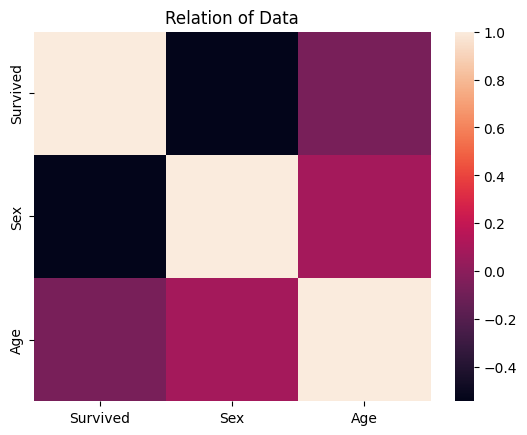

In [5]:
sns.heatmap(training_dataset.corr())
plt.title('Relation of Data')

**Extracting dependant and independant values**

In [6]:
train_x = training_dataset[['Sex', 'Age']]
train_y = training_dataset[['Survived']]
train_y = np.ravel(train_y)

**Feature Scaling for standarization**

In [7]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)

**Fitting Logistic Regression**

In [8]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(train_x, train_y)

LogisticRegression(random_state=0)

**Loading Testing dataset**

In [9]:
test_x = pd.read_csv('test.csv')[['Sex', 'Age']]

**Cleaning data**

In [10]:
test_x['Sex'] = encoder.fit_transform(test_x['Sex'])
mean_age = test_x['Age'].mean(skipna=True)
test_x['Age'] = test_x['Age'].fillna(mean_age)
test_x = scaler.fit_transform(test_x)

**Saving the predicted Results**

In [11]:
predicted_y = classifier.predict(test_x)
my_info = pd.DataFrame(predicted_y)
my_info.to_csv('info.csv')

**Visualizing the training dataset**

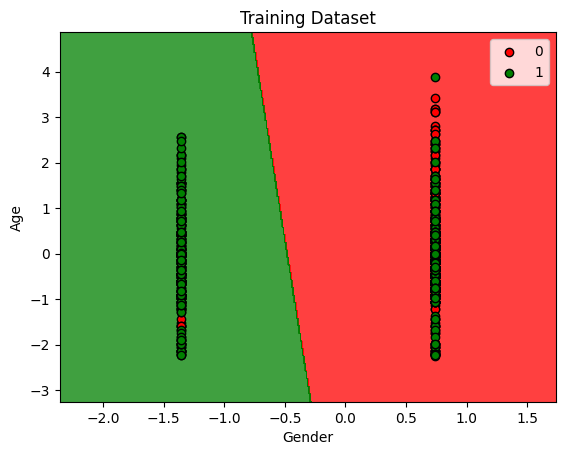

In [12]:
# Plotting decision boundary
X_set, y_set = train_x, train_y
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Scatter plot for data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=j, edgecolors='black')

# Set axis limits and labels
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Training Dataset')

# Add legend
plt.legend()

# Show the plot
plt.show()

**Visualizing testing dataset with predicted results**

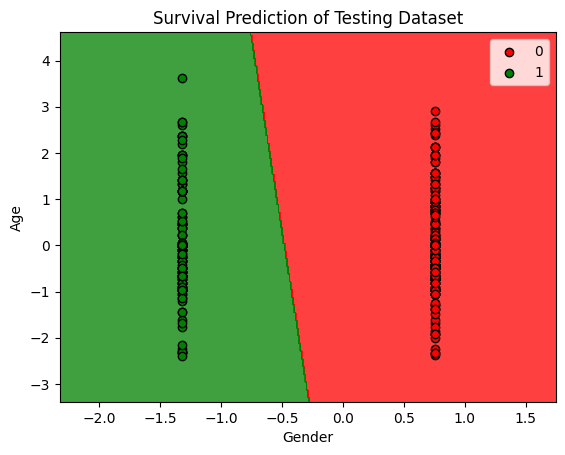

In [13]:
X_set, y_set = test_x, predicted_y
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Plot the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Scatter plot for data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=j, edgecolors='black')

# Set axis limits and labels
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Survival Prediction of Testing Dataset')

# Add legend
plt.legend()

# Show the plot
plt.show()